In [2]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# STATISTICS
# from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution,
# to see whether your sample is normally distributed or not

# I. Import data

In [3]:
from sklearn.utils import shuffle

df = shuffle(pd.read_csv('/Users/margauxlacroix/Downloads/20250609_9k_spotify_metrics_lyrics_data.csv'))
df.head()

,Unnamed: 0,artist,song,link,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned
3333,3333,Yellowcard,Miles Apart,/y/yellowcard/miles+apart_10195542.html,If I could I would do all of this again Travel...,18eq41lcx45De3EvIl4t7J,41,2003,pop,0.357,0.968,2,-3.425,1,0.0601,0.000006,0.00000,0.0549,0.763,181.676,212333,4,Miles Apart
2604,2604,Roy Orbison,Coming Home,/r/roy+orbison/coming+home_10244679.html,It's a long and lonely highway. When you're tr...,0y24jS32Msz0vmm8i9i8ZH,35,2020,rock-n-roll,0.534,0.388,4,-12.757,1,0.0246,0.590000,0.00208,0.1610,0.434,80.207,242093,4,Coming Home
5479,5479,John Legend,Tomorrow,/j/john+legend/tomorrow_21085502.html,With good understanding and a lot of patience ...,0LoL9e5uLLtjYOx41TRcxE,31,2013,soul,0.617,0.572,9,-9.199,0,0.0257,0.145000,0.00000,0.2930,0.659,83.768,212987,4,Tomorrow
4987,4987,Guided By Voices,I Am Columbus,/g/guided+by+voices/i+am+columbus_21077566.html,Gather around See is mine Disappear that man O...,6kMlyU1RO0luKqdf6IAMU5,1,2014,power-pop,0.302,0.947,4,-2.275,0,0.0707,0.000208,0.06270,0.0630,0.608,108.291,174667,4,I Am Columbus
6970,6970,OneRepublic,Counting Stars,/o/onerepublic/counting+stars_21047728.html,"Lately I've been, I've been losing sleep Dream...",6sy3LkhNFjJWlaeSMNwQ62,76,2014,piano,0.664,0.705,1,-4.972,0,0.0382,0.065400,0.00000,0.1150,0.477,122.017,257840,4,Counting Stars


In [4]:
df.drop(columns=['Unnamed: 0', 'link'], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8890 entries, 3333 to 3625
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            8890 non-null   object 
 1   song              8890 non-null   object 
 2   text              8890 non-null   object 
 3   track_id          8890 non-null   object 
 4   popularity        8890 non-null   int64  
 5   year              8890 non-null   int64  
 6   genre             8890 non-null   object 
 7   danceability      8890 non-null   float64
 8   energy            8890 non-null   float64
 9   key               8890 non-null   int64  
 10  loudness          8890 non-null   float64
 11  mode              8890 non-null   int64  
 12  speechiness       8890 non-null   float64
 13  acousticness      8890 non-null   float64
 14  instrumentalness  8890 non-null   float64
 15  liveness          8890 non-null   float64
 16  valence           8890 non-null   float64
 1

# II. Prepare data

## 1. Define numerical features

In [6]:
num_features = df.select_dtypes(exclude=['object'])
num_features

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
3333,41,2003,0.357,0.968,2,-3.425,1,0.0601,0.000006,0.00000,0.0549,0.763,181.676,212333,4
2604,35,2020,0.534,0.388,4,-12.757,1,0.0246,0.590000,0.00208,0.1610,0.434,80.207,242093,4
5479,31,2013,0.617,0.572,9,-9.199,0,0.0257,0.145000,0.00000,0.2930,0.659,83.768,212987,4
4987,1,2014,0.302,0.947,4,-2.275,0,0.0707,0.000208,0.06270,0.0630,0.608,108.291,174667,4
6970,76,2014,0.664,0.705,1,-4.972,0,0.0382,0.065400,0.00000,0.1150,0.477,122.017,257840,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,25,2006,0.686,0.530,1,-10.504,0,0.0291,0.724000,0.01020,0.3530,0.925,94.621,138293,4
6369,37,2000,0.568,0.966,0,-4.896,0,0.0579,0.000303,0.54400,0.0705,0.282,129.972,201493,4
3799,24,2017,0.581,0.341,4,-11.928,1,0.0295,0.818000,0.00002,0.1170,0.329,93.536,411469,4
6288,16,2008,0.666,0.796,2,-8.942,1,0.0356,0.417000,0.00000,0.1410,0.818,95.964,169307,4


## 2. Correlations

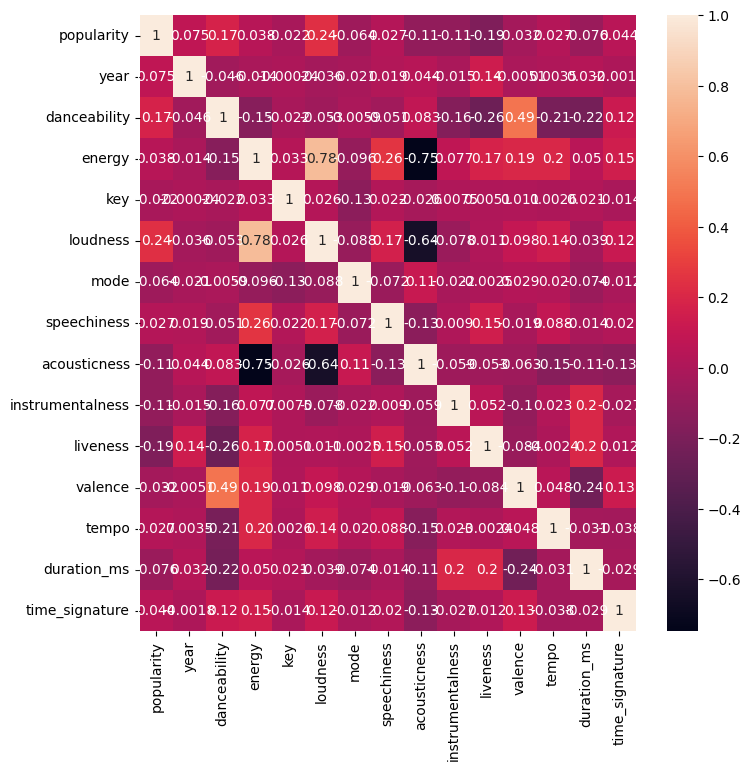

In [7]:
plt.figure(figsize=(8,8))

sns.heatmap(num_features.corr(),
            annot = True,
            annot_kws = {"fontsize":10});

# III. Clustering

## 1. Default clustering

In [8]:
default_knn = KMeans()
default_knn.fit(num_features)

labels_default = default_knn.labels_
labels_default

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 7, 1, ..., 3, 4, 1], dtype=int32)

In [9]:
fig = px.scatter_3d(num_features,
                    x = 'danceability',
                    y = 'energy',
                    z = 'speechiness',
                    color = labels_default, width=500, height=500)
fig.show()

## 2. Better clustering

### 2.1 Scale features

In [10]:
scaler = MinMaxScaler()
num_features_scaled = pd.DataFrame(scaler.fit_transform(num_features), columns=num_features.columns)
num_features_scaled

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.471264,0.130435,0.308031,0.967992,0.181818,0.868380,1.0,0.042974,0.000006,0.000000,0.039825,0.765698,0.787101,0.106898,0.75
1,0.402299,0.869565,0.502750,0.387852,0.363636,0.525858,1.0,0.002183,0.593561,0.002095,0.147618,0.423097,0.182323,0.124786,0.75
2,0.356322,0.565217,0.594059,0.571897,0.818182,0.656451,0.0,0.003447,0.145875,0.000000,0.281723,0.657399,0.203548,0.107291,0.75
3,0.011494,0.608696,0.247525,0.946987,0.363636,0.910589,0.0,0.055153,0.000209,0.063142,0.048054,0.604290,0.349710,0.084257,0.75
4,0.873563,0.608696,0.645765,0.704929,0.090909,0.811598,0.0,0.017810,0.065795,0.000000,0.100884,0.467875,0.431520,0.134251,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8885,0.287356,0.260870,0.669967,0.529887,0.090909,0.608552,0.0,0.007354,0.728370,0.010272,0.342680,0.934396,0.268234,0.062393,0.75
8886,0.425287,0.000000,0.540154,0.965992,0.000000,0.814388,0.0,0.040446,0.000305,0.547835,0.055674,0.264813,0.478934,0.100382,0.75
8887,0.275862,0.739130,0.554455,0.340841,0.363636,0.556286,1.0,0.007813,0.822938,0.000020,0.102916,0.313756,0.261767,0.226596,0.75
8888,0.183908,0.347826,0.647965,0.795951,0.181818,0.665884,1.0,0.014822,0.419517,0.000000,0.127299,0.822972,0.276238,0.081035,0.75


In [11]:
kmeans_scaled = KMeans()
kmeans_scaled.fit(num_features_scaled)

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans()

In [12]:
labels_scaled = kmeans_scaled.labels_
labels_scaled

array([0, 5, 3, ..., 5, 0, 2], dtype=int32)

In [13]:
fig_scaled = px.scatter_3d(num_features_scaled,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = labels_scaled,
                           width=500, height=500)
fig_scaled.show()

### 2.2 PCA

In [14]:
pca = PCA()
pca.fit(num_features_scaled)

PCA()

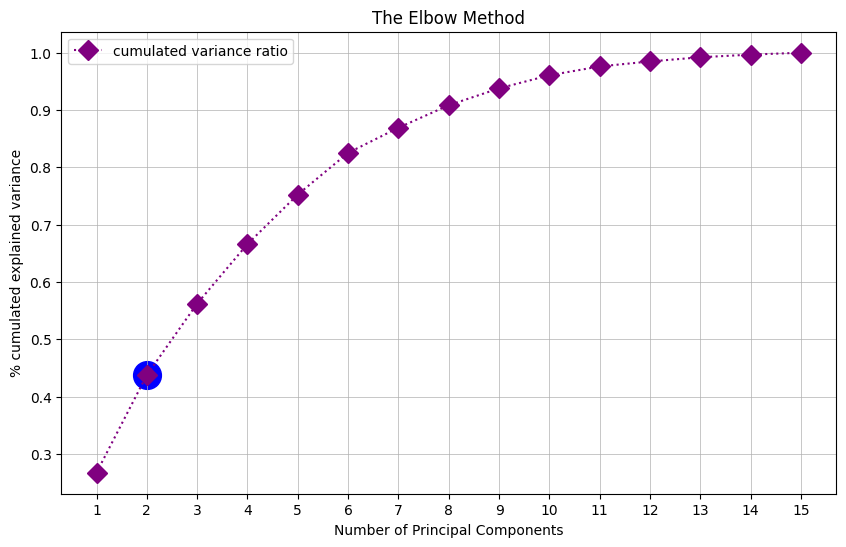

In [15]:
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=10)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(2,explained_variance_ratio_cumulated[1],c='blue',s=400)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

In [16]:
pca = PCA(n_components=8, whiten=True)
pca.fit(num_features_scaled)
num_features_proj = pd.DataFrame(pca.transform(num_features_scaled))
num_features_proj

,0,1,2,3,4,5,6,7
0,-0.495561,-1.411886,0.771759,-1.173942,-0.318622,-0.009687,-0.888517,2.064948
1,-0.885269,1.265777,0.203582,0.479425,1.501002,-1.142212,0.364537,-1.020180
2,1.598540,0.566342,-0.677333,-0.269533,1.115275,0.136080,0.673670,-1.125576
3,1.613970,-0.466989,0.709222,0.016245,0.609839,-0.170990,-2.088100,-1.368744
4,1.465253,0.052101,1.704810,-0.539557,0.907849,-1.624869,1.677637,0.814786
...,...,...,...,...,...,...,...,...
8885,1.055997,1.599752,1.514643,-1.042783,1.073987,2.074532,0.405098,0.104192
8886,1.501948,-0.478923,1.915948,-0.567520,-1.713479,-0.211185,-0.542171,-0.267096
8887,-0.999894,1.797736,0.177252,0.430008,0.933459,-0.859381,-0.121534,-0.728454
8888,-0.778583,0.026057,0.720071,-1.082819,0.869899,0.923832,-0.320789,-0.830517


In [17]:
kmeans_pca = KMeans()
kmeans_pca.fit(num_features_proj)

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans()

In [18]:
labels_kmeans_pca = kmeans_pca.labels_
labels_kmeans_pca

array([4, 5, 7, ..., 0, 3, 4], dtype=int32)

In [19]:
fig_scaled = px.scatter_3d(num_features_scaled,
                           x = 'danceability',
                           y = 'energy',
                           z = 'speechiness',
                           color = labels_kmeans_pca,
                          width=500, height=500)
fig_scaled.show()

In [20]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [21]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(num_features_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 3 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 4 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 5 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 6 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 7 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 8 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 9 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 10 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 11 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 12 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 13 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 14 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 15 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 16 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 17 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 18 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 19 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



working with 20 clusters...


/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



DONE !


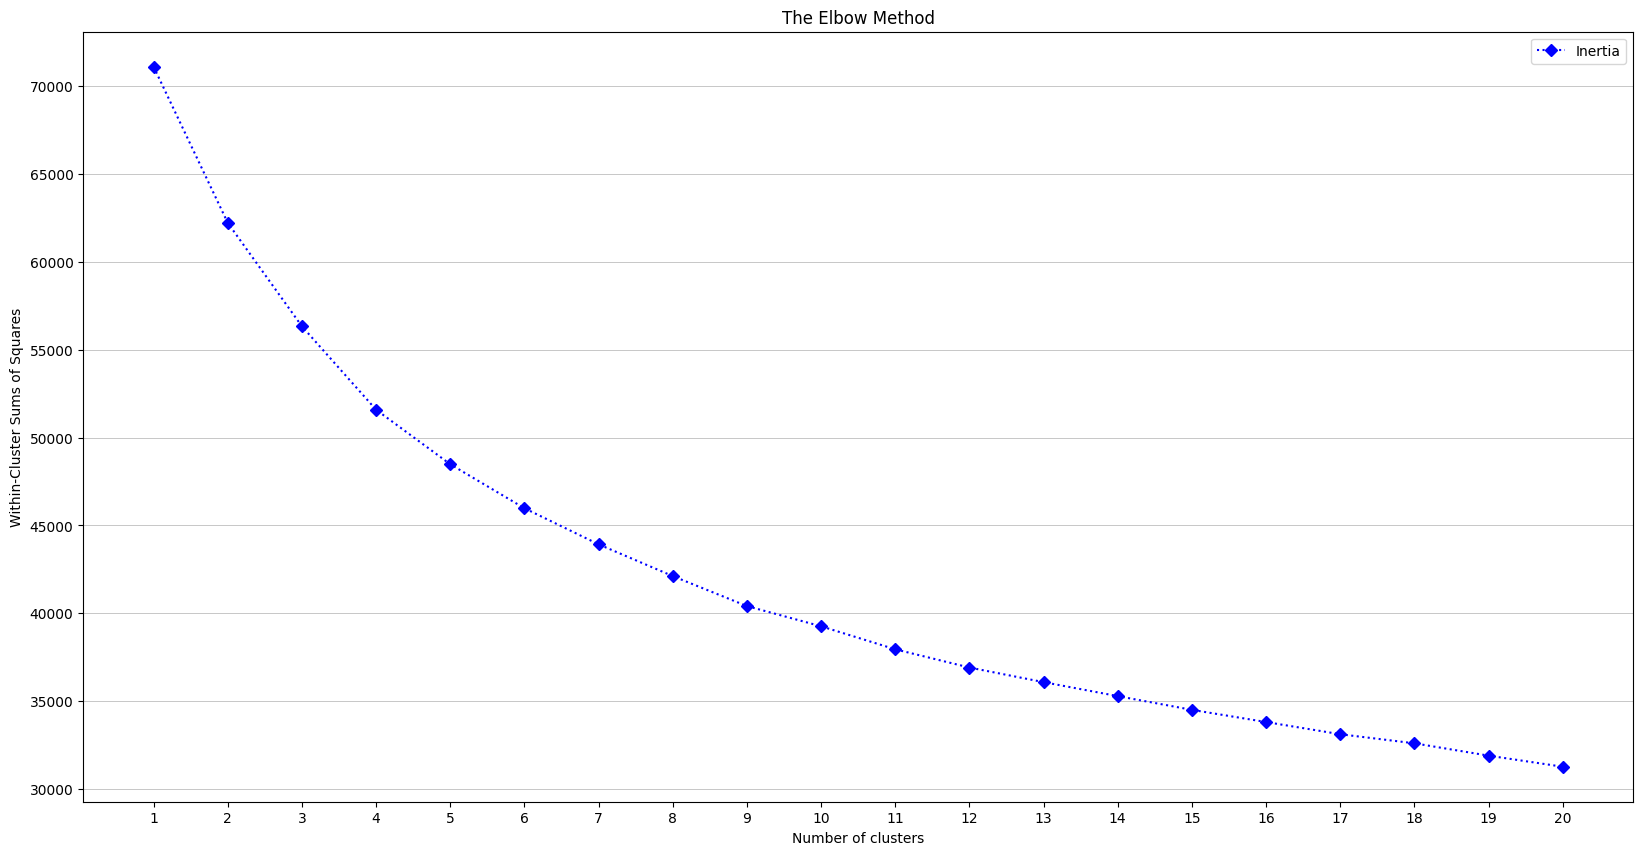

In [22]:
elbow_highlight = 4
with plt.style.context('fast'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    # ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)
    # annotate
#     ax.annotate("Elbow?",
#                 (elbow_highlight,wcss[elbow_highlight-1]),
#                 (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000),
#                 arrowprops=dict(facecolor='black'),
#                 fontsize=16,
# #                horizontalalignment='middle',
#                 verticalalignment='top')

    ax.grid(axis="y",linewidth=0.5)
    plt.show()

In [23]:
kmeans = KMeans(n_clusters = 10)

kmeans.fit(num_features_proj)

labelling = kmeans.labels_

fig_scaled = px.scatter_3d(num_features_proj,
                           x = 6,
                           y = 3,
                           z = 2,
                           color=labelling,
                           width=500,
                           height=500)
fig_scaled.show()

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [24]:
df_labelled = pd.concat([df,pd.Series(labelling)],axis=1).rename(columns={0:"label"})
df_labelled

,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
3333,Yellowcard,Miles Apart,If I could I would do all of this again Travel...,18eq41lcx45De3EvIl4t7J,41,2003,pop,0.357,0.968,2,-3.425,1,0.0601,0.000006,0.00000,0.0549,0.763,181.676,212333,4,Miles Apart,3
2604,Roy Orbison,Coming Home,It's a long and lonely highway. When you're tr...,0y24jS32Msz0vmm8i9i8ZH,35,2020,rock-n-roll,0.534,0.388,4,-12.757,1,0.0246,0.590000,0.00208,0.1610,0.434,80.207,242093,4,Coming Home,8
5479,John Legend,Tomorrow,With good understanding and a lot of patience ...,0LoL9e5uLLtjYOx41TRcxE,31,2013,soul,0.617,0.572,9,-9.199,0,0.0257,0.145000,0.00000,0.2930,0.659,83.768,212987,4,Tomorrow,7
4987,Guided By Voices,I Am Columbus,Gather around See is mine Disappear that man O...,6kMlyU1RO0luKqdf6IAMU5,1,2014,power-pop,0.302,0.947,4,-2.275,0,0.0707,0.000208,0.06270,0.0630,0.608,108.291,174667,4,I Am Columbus,6
6970,OneRepublic,Counting Stars,"Lately I've been, I've been losing sleep Dream...",6sy3LkhNFjJWlaeSMNwQ62,76,2014,piano,0.664,0.705,1,-4.972,0,0.0382,0.065400,0.00000,0.1150,0.477,122.017,257840,4,Counting Stars,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,Roy Orbison,Lana,"Zuhm-ma zhum-ma-zhum-ma, Zuhm-ma zhum-ma-zhum-...",1jgwAJte9RGkVuxx0ixakt,25,2006,rock-n-roll,0.686,0.530,1,-10.504,0,0.0291,0.724000,0.01020,0.3530,0.925,94.621,138293,4,Lana,1
6369,Marilyn Manson,Burning Flag,"They wanna sell it out, buy it up And dumb it ...",5fPiWCdaoQHFTWWyrKB4CH,37,2000,alt-rock,0.568,0.966,0,-4.896,0,0.0579,0.000303,0.54400,0.0705,0.282,129.972,201493,4,Burning Flag,5
3799,Bob Dylan,A Hard Rain's A-Gonna Fall,"Oh, where have you been, my blue-eyed son? And...",0vPg3XPyo0dZdURoEDQkFq,24,2017,singer-songwriter,0.581,0.341,4,-11.928,1,0.0295,0.818000,0.00002,0.1170,0.329,93.536,411469,4,A Hard Rain's A-Gonna Fall,6
6288,Lynyrd Skynyrd,Double Trouble,"Eleven times I been busted, eleven times I bee...",7vTgJcBFJgQy2mMxMpo92T,16,2008,blues,0.666,0.796,2,-8.942,1,0.0356,0.417000,0.00000,0.1410,0.818,95.964,169307,4,Double Trouble,8


In [25]:
df_labelled.label.value_counts()

label
4    996
8    975
0    968
5    961
1    947
7    855
6    835
2    833
3    805
9    715
Name: count, dtype: int64

In [26]:
daily_mixes = {}

for numero_cluster in np.unique(labelling):
    daily_mixes[numero_cluster] = df_labelled[df_labelled.label == numero_cluster]

In [27]:
for key,value in daily_mixes.items():
    print("-"*50)
    print(f"Here are some songs for the playlist number {key}")
    print("-"*50)
    display(value.sample(20))

--------------------------------------------------
Here are some songs for the playlist number 0
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
5592,Josh Groban,Pure Imagination,Come with me and you'll be In a world of pure ...,57a4gxXY4coOkoAsY6seIQ,10,2016,opera,0.188,0.3790,1,-9.248,1,0.0362,0.806000,0.000008,0.7080,0.0944,175.508,267610,4,Pure Imagination,0
3729,Billie Holiday,He's Funny That Way,Never had nothing No one to care That's why I ...,3xQO8iFyuZRZEyGDUuO5Er,22,2022,blues,0.610,0.0139,11,-21.692,0,0.0552,0.987000,0.000063,0.1930,0.3140,75.594,175538,4,He's Funny That Way,0
3154,Wanda Jackson,The Box It Came In,My clothes are all ragged my goodwill coat's n...,0LfqI5OdqBNSkE2Z5TdUXz,7,2007,rock-n-roll,0.461,0.2740,2,-10.317,1,0.0297,0.588000,0.000000,0.1130,0.4450,97.099,144853,4,The Box It Came In,0
1092,INXS,Perfect Strangers,"Don't tell me your name, just use that pretty ...",0xAxitIIBkKibCEfGLZEwE,22,2005,funk,0.575,0.9150,7,-5.261,1,0.0443,0.004260,0.000000,0.3340,0.6780,115.990,252213,4,Perfect Strangers,0
6667,Neil Diamond,My Special Someone,You are my special someone All I will ever nee...,762A1Neqruh5kPtqtFLDDJ,8,2001,songwriter,0.580,0.3430,2,-12.028,1,0.0288,0.798000,0.000006,0.1110,0.5010,92.319,215560,4,My Special Someone,0
1912,Nickelback,Figured You Out,I like your pants around your feet And I like ...,0rdqmkTQAOLgEUbrj4Avxf,34,2001,alt-rock,0.560,0.8850,10,-4.467,0,0.0576,0.000029,0.005410,0.2480,0.7080,93.975,229427,4,Figured You Out,0
2955,Twenty One Pilots,Oh Ms Believer,Oh Ms. Believer. My pretty sleeper. Your twist...,3FvV3j98xtcylQF1drDc9j,58,2009,rock,0.501,0.3280,0,-8.329,1,0.0255,0.612000,0.000000,0.1500,0.2630,73.326,217000,4,Oh Ms Believer,0
5672,Justin Bieber,Favorite Girl,"Oh, wooh uh, Oh, ohh, Wooh, uh ooh, I always k...",5dZB7BCprgSulKTTF5nAKh,0,2023,pop,0.580,0.6800,7,-4.470,1,0.0439,0.045100,0.000000,0.1000,0.6280,176.037,256800,4,Favorite Girl,0
114,Ariana Grande,Just A Little Bit Of Your Heart,"[Verse 1] Oh, oh, oh, oh I don't ever ask you ...",5lvnGiTAH9BVlJLHc0DXZz,61,2014,pop,0.439,0.3220,9,-5.959,1,0.0280,0.692000,0.000000,0.1030,0.1600,77.963,232587,4,Just A Little Bit Of Your Heart,0
8294,Tom Waits,Jersey Girl,"Got no time for the corner boys, Down in the s...",4w06qSCz2ea5CZoxbtCptw,20,2001,folk,0.337,0.2460,2,-18.366,1,0.0310,0.144000,0.030900,0.0843,0.2420,176.082,311733,4,Jersey Girl,0


--------------------------------------------------
Here are some songs for the playlist number 1
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
643,Etta James,Misty Blue,"Oh, it's been a long, long time Looks like to ...",4YCtZZOGZ3zh0LmiVbkz47,41,2011,blues,0.544,0.321,9,-9.057,1,0.0477,0.726000,0.000004,0.1340,0.315,121.326,297973,3,Misty Blue,1
1411,Kid Rock,"Jackson, Mississippi",And when the sunshine showed Her face I felt l...,4SXMRJugy8ifYJdoS9cXGg,43,2003,metal,0.536,0.785,7,-4.857,1,0.0337,0.000676,0.003290,0.1010,0.356,128.773,270107,4,"Jackson, Mississippi",1
6680,New Order,Run Wild,Open hearts Empty spaces Dusty roads To distan...,0FkH6eL7oODyXoGyG8jw86,15,2001,punk-rock,0.568,0.415,4,-11.050,1,0.0245,0.029600,0.000291,0.1070,0.359,82.994,236733,4,Run Wild,1
1663,Lou Reed,Modern Dance,Maybe I should go and live in Amsterdam In a s...,4ekwUZXOffhYB38taSBvUm,20,2000,psych-rock,0.354,0.441,9,-11.378,1,0.0407,0.025100,0.000374,0.0908,0.434,169.767,249907,4,Modern Dance,1
307,Chris Brown,Gotta Be Ur Man,Gotta be your man. I gotta be your man. I gott...,4Yt9SWPPXcxJbIq9GTtIFF,34,2009,dance,0.701,0.818,0,-3.868,0,0.0562,0.011900,0.000000,0.1850,0.356,119.983,196187,4,Gotta Be Ur Man,1
1891,Nick Drake,Black Mountain Blues,Old Black Mountain Tried to spit in your face ...,53C6Zmy7oPeMHz082YRZBB,17,2007,singer-songwriter,0.630,0.224,6,-15.138,1,0.0437,0.902000,0.110000,0.1330,0.510,75.969,156747,4,Black Mountain Blues,1
2833,Taylor Swift,Long Live,I said remember this moment In the back of my ...,6XDBA3QWX51lDJ0oZbaJJN,57,2010,pop,0.418,0.680,7,-4.300,1,0.0346,0.036000,0.000076,0.1080,0.142,204.125,317947,4,Long Live,1
4465,Elvis Presley,Help Me,"Lord, help me walk another mile, just one more...",0cIYWjpHEMldN6EaZFpERh,26,2013,rock-n-roll,0.511,0.485,2,-10.873,1,0.0300,0.853000,0.037300,0.1640,0.548,116.966,148493,4,Help Me,1
6762,Nightwish,Gethsemane,Toll no bell for me father But let this cup of...,0uucxad3w4WzVLAeXwYHtV,29,2019,goth,0.446,0.921,2,-8.103,0,0.0728,0.000063,0.011800,0.9680,0.213,125.465,342213,4,Gethsemane,1
6980,OneRepublic,Passenger,"I saw your face, stuck in a crowd Silently scr...",3LzDGNWo1EuIN1bW2RTw2x,23,2009,piano,0.303,0.677,6,-6.505,1,0.0367,0.114000,0.000027,0.1090,0.191,125.967,240480,4,Passenger,1


--------------------------------------------------
Here are some songs for the playlist number 2
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
4846,Gordon Lightfoot,Rainy Day People,Rainy day people always seem to know when it's...,1HNbr3mt9GkC54c5zs1HG0,12,2012,singer-songwriter,0.598,0.385,11,-11.922,1,0.0317,0.426000,0.003480,0.7390,0.7890,112.302,133520,4,Rainy Day People,2
6548,Miley Cyrus,Can't Be Tamed,Like a Mafia For those who don't know me I can...,2r6DdaSbkbwoPzuK6NjLPn,65,2010,pop,0.630,0.910,11,-2.919,0,0.1440,0.028700,0.000000,0.1960,0.7430,116.980,168213,4,Can't Be Tamed,2
6739,Nicki Minaj,Moment 4 Life,"I fly with the stars in the skies, I am no lon...",1ia019RqDK2o4QiANR1Dyn,70,2010,dance,0.475,0.882,11,-3.883,1,0.3510,0.406000,0.000000,0.2410,0.3690,98.001,279307,4,Moment 4 Life,2
3841,Bon Jovi,No Apologies,No apology (no apology) We will not back down ...,2CFgB7CeSTBE5yWCGPYpJX,36,2010,metal,0.459,0.829,3,-5.168,1,0.0456,0.056700,0.000000,0.3390,0.4240,131.406,224853,4,No Apologies,2
6095,Lana Del Rey,Honeymoon,[Verse 1] We both know that it's not fashionab...,4X5zaUdlRhvBWYnyQIKmH8,61,2015,pop,0.169,0.269,5,-13.265,0,0.0360,0.953000,0.008280,0.1110,0.1730,74.847,350059,3,Honeymoon,2
4901,Grateful Dead,Here Comes Sunshine,"Wake of the flood, laughing water, forty-nine ...",4akDJSVLSY9YDP2tiWNAvU,10,2012,psych-rock,0.630,0.335,0,-15.861,1,0.0280,0.882000,0.616000,0.7120,0.5210,93.887,696280,4,Here Comes Sunshine,2
393,Culture Club,Cold Shoulder,Watching the stars on Primrose Hill The moon i...,2NOTVddFsG5v5q2X6bPejr,6,2003,disco,0.321,0.754,6,-5.787,0,0.0434,0.037700,0.000000,0.3090,0.5430,172.868,279000,4,Cold Shoulder,2
6392,Marilyn Manson,Kinderfeld,He lives inside my mouth And tells me what to ...,16bUHDjZ0q9XNH7v2iHaxt,6,2009,industrial,0.609,0.827,10,-8.454,1,0.0286,0.005300,0.284000,0.2970,0.7950,108.023,291947,4,Kinderfeld,2
99,Alice Cooper,It's Much Too Late,"I never kicked a dog, a child or my wife I nev...",3GwSOpTHojVlxMzDcgDC24,6,2003,hard-rock,0.480,0.715,2,-4.902,1,0.0313,0.000299,0.000021,0.1110,0.4690,164.087,278373,4,It's Much Too Late,2
1325,Justin Bieber,That Should Be Me,Everybody's laughing in my mind Rumors spreadi...,4I0b0kndRAcM2tiZoz8g5B,0,2023,pop,0.545,0.607,8,-5.660,1,0.0322,0.212000,0.000000,0.1580,0.2200,139.973,232747,4,That Should Be Me,2


--------------------------------------------------
Here are some songs for the playlist number 3
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
1526,Lana Del Rey,Young And Beautiful,"I've seen the world, done it all Had my cake n...",2nMeu6UenVvwUktBCpLMK9,81,2013,pop,0.324,0.416,11,-8.920,0,0.0368,0.26200,0.000037,0.1100,0.1510,113.986,236053,4,Young And Beautiful,3
2646,Scorpions,Still Loving You,"Time, it needs time To win back your love agai...",5Wmjd2aYy1CHNI8nEBZ8NC,20,2001,german,0.264,0.439,8,-9.510,0,0.0299,0.04380,0.008650,0.1560,0.0776,101.704,390640,4,Still Loving You,3
3564,Alice In Chains,I Stay Away,"Yeah, I want to travel south this year Aaah, W...",6JaafEcWjKEZK9UMmgkGn4,27,2001,alt-rock,0.195,0.855,6,-5.328,1,0.0442,0.09150,0.000571,0.0886,0.3600,82.974,254493,4,I Stay Away,3
4892,Grateful Dead,Doin' That Rag,Sitting in Mangrove Valley chasing lightbeams ...,1xgAsromen3UzVISBfIsJv,10,2015,psych-rock,0.460,0.244,4,-15.052,1,0.0450,0.89400,0.000452,0.1240,0.6030,79.516,412493,4,Doin' That Rag,3
1603,Lionel Richie,Don't Stop The Music,"Don't stop the music The music, the music, the...",0A5DfcMYOGvOLoA4NGfZ9N,14,2000,disco,0.700,0.934,7,-5.354,0,0.0386,0.06120,0.000004,0.0376,0.9620,130.040,256227,4,Don't Stop The Music,3
1184,Jason Mraz,Wordplay,I've been all around the world I've been a new...,0dPEdhmHYpxnQbcX7vyfGI,12,2014,acoustic,0.464,0.877,7,-3.793,1,0.0499,0.19200,0.000000,0.0999,0.5120,176.667,186507,4,Wordplay,3
4635,Fall Out Boy,Of All The Gin Joints In All The World,You only hold me up like this 'Cause you don't...,4304kbwhzhb8A3n6wl27Kg,54,2005,emo,0.420,0.930,0,-3.416,1,0.0571,0.00470,0.000000,0.0719,0.7090,172.124,191160,4,Of All The Gin Joints In All The World,3
7797,Sia,Elastic Heart,And another one bites the dust But why can I n...,5S9lfZu1YF8xKkgSsqL2Bd,65,2015,pop,0.421,0.791,9,-4.998,1,0.0496,0.01170,0.000015,0.1460,0.4990,130.075,257200,4,Elastic Heart,3
5538,Johnny Cash,A Singer Of Songs,I'm not a savior and I'm not a saint The man w...,3SxCKo42XlUM3ukLjWaiN9,23,2003,country,0.517,0.325,9,-12.024,1,0.0489,0.60700,0.000032,0.0854,0.5300,110.360,168867,3,A Singer Of Songs,3
7365,Poison,I Want Action,I want action tonight Satisfaction all night I...,4vm6OFo0R4hicmmcujCLUg,18,2006,hard-rock,0.528,0.945,3,-3.563,1,0.0557,0.02120,0.000000,0.1830,0.6190,146.793,185893,4,I Want Action,3


--------------------------------------------------
Here are some songs for the playlist number 4
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
3478,ZZ Top,Two Ways To Play,Something crossed my mind again and you were i...,7oydxp2n9JUBC1X7w4Anmk,20,2003,blues,0.508,0.764,10,-5.985,1,0.0279,0.008300,0.000474,0.1020,0.4950,82.011,255627,4,Two Ways To Play,4
6087,Lana Del Rey,Burning Desire,Every Saturday night I get dressed up to ride ...,2Za7Yhteh4XcUXnNYxTIHH,62,2012,pop,0.481,0.641,7,-10.800,1,0.1320,0.842000,0.004540,0.1340,0.1610,131.812,231132,4,Burning Desire,4
29,ABBA,Man In The Middle,Did you see that man in the limousine With the...,1NNP9rBRmr2aCehIXyfDBN,27,2014,swedish,0.647,0.716,0,-9.470,1,0.0612,0.076300,0.000001,0.0566,0.9610,167.437,181120,4,Man In The Middle,4
3258,Within Temptation,Memories,In this world you tried Not leaving me alone b...,5qOA9jbfWAtxOJ8zY1ReYf,51,2004,goth,0.430,0.676,10,-7.367,0,0.0272,0.150000,0.000002,0.1870,0.2150,90.927,231187,4,Memories,4
8631,Weezer,Photograph,If you want it (oo-oo-oo) You can have it (oo-...,4hA3OFMvHCFCK3TfJYdbif,46,2001,alt-rock,0.463,0.899,9,-4.554,1,0.0459,0.000093,0.001450,0.3950,0.4040,124.796,139093,4,Photograph,4
7379,Poison,Unskinny Bop,What's got you so jumpy? Why can't you sit sti...,3FbwVxbPyvAFggxeMU7ePz,23,2000,hard-rock,0.602,0.895,1,-5.468,1,0.0752,0.377000,0.000000,0.8220,0.7240,96.133,242507,4,Unskinny Bop,4
3374,Zac Brown Band,Mary,"Mary, Mary, why you want to do me this way? I ...",7lwrtYowQbgNimtOwSXVDK,40,2008,country,0.637,0.947,4,-5.875,1,0.0458,0.160000,0.000038,0.1780,0.8050,144.992,168000,4,Mary,4
4350,Ed Sheeran,Grade 8,"My mind is a warrior, My heart is a foreigner,...",0obzwoGjXdORtAwYWZ9s53,50,2011,pop,0.740,0.807,0,-9.976,0,0.0363,0.044600,0.000040,0.0538,0.7810,101.042,179880,4,Grade 8,4
4631,Fall Out Boy,Love Will Tear Us Apart,When routine bites hard And ambitions are low ...,07goh57AE19v987J8tUHIt,33,2005,emo,0.587,0.673,11,-7.756,0,0.0329,0.065400,0.001540,0.0986,0.3290,152.138,202347,4,Love Will Tear Us Apart,4
8702,Willie Nelson,Basin Street Blues,No won't you come along with me Down the Missi...,1RoNdytaE8AeIECEY3Dqfd,13,2008,singer-songwriter,0.544,0.338,11,-7.747,0,0.0419,0.721000,0.181000,0.7750,0.3950,95.239,296387,4,Basin Street Blues,4


--------------------------------------------------
Here are some songs for the playlist number 5
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
8645,Whiskeytown,Choked Up,I don't know why we can't talk Every time we t...,43Cgrr6mo4VfUu4KF2vRhb,10,2003,indie-pop,0.722,0.664,4,-8.946,1,0.0322,0.086600,0.002350,0.1830,0.7640,124.984,188800,4,Choked Up,5
8101,System Of A Down,Mr. Jack,Hey Mr. Jack Is that the mouthwash in your eye...,4TYI2YExAWaIOpGP4y7AbI,57,2002,metal,0.306,0.709,0,-3.593,1,0.0376,0.000082,0.004520,0.1010,0.0436,154.150,249627,4,Mr. Jack,5
8648,Whiskeytown,Jacksonville Skyline,The banks of the river run through my hometown...,3OYH2OCLzjGm9kyyTHB2ZX,46,2001,alt-rock,0.585,0.213,11,-13.667,1,0.0442,0.608000,0.000009,0.1060,0.3210,142.627,180960,3,Jacksonville Skyline,5
2847,Taylor Swift,You Belong With Me,You're on the phone with your girlfriend She's...,3GCL1PydwsLodcpv0Ll1ch,68,2008,pop,0.687,0.783,6,-4.440,1,0.0386,0.162000,0.000013,0.1140,0.4430,129.964,231133,4,You Belong With Me,5
7473,Randy Travis,1982,"Operator, please connect me with 1982 I need t...",67R5n7K5FvzYfLyWsEHmaU,22,2020,gospel,0.618,0.530,4,-8.129,1,0.0254,0.099400,0.000002,0.0900,0.5710,108.088,179307,4,1982,5
7004,Otis Redding,I've Been Loving You Too Long,I've been loving you too long to stop now You ...,06efNpKkf1VU5XWdVXgNeh,12,2012,blues,0.494,0.226,9,-12.479,1,0.0302,0.541000,0.000003,0.1080,0.1210,137.520,195013,3,I've Been Loving You Too Long,5
7592,Red Hot Chili Peppers,Ethiopia,"""We're rolling everybody, It starts with bass""...",33sXl7ETOUGrHp1mSfr9R1,44,2011,alt-rock,0.635,0.770,9,-3.591,0,0.0336,0.064800,0.000003,0.1150,0.6650,96.697,230707,4,Ethiopia,5
1437,King Diamond,Help!!!,Help... help... can anybody help me now? Help....,0uC4QzWe0J2lWYWEORmqKo,11,2000,death-metal,0.380,0.961,9,-3.794,1,0.0690,0.000762,0.251000,0.6900,0.4330,182.406,261800,4,Help!!!,5
858,Glen Campbell,True Grit,"One day, little girl, the sadness will leave y...",6dTT3tzSO3jJTnSOSTjj81,28,2009,country,0.460,0.825,7,-4.680,0,0.0563,0.424000,0.006410,0.2820,0.7380,111.977,151920,4,True Grit,5
156,The Beatles,Boys,"I been told when a boy kiss a girl, Take a tri...",3b4XdfAEmkrt90CRn6kJpO,20,2013,psych-rock,0.502,0.609,9,-10.167,1,0.0364,0.644000,0.000000,0.4960,0.7920,144.439,148773,4,Boys,5


--------------------------------------------------
Here are some songs for the playlist number 6
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
4563,Extreme,Cupid's Dead,you read the papers today? I read the news tod...,5fopJpKpov19I1W6fhcuPN,13,2000,hard-rock,0.658,0.933,10,-6.238,0,0.0493,0.007860,0.210000,0.0157,0.885,120.708,356600,4,Cupid's Dead,6
6708,Nickelback,Gotta Be Somebody,This time I wonder what it feels like To find ...,1Ex03J4vg2NUitc2JNe77R,34,2001,alt-rock,0.583,0.913,0,-4.848,1,0.0492,0.001070,0.002370,0.1400,0.247,116.005,252760,4,Gotta Be Somebody,6
3077,Van Morrison,Celtic New Year,If I don't see you through the week See you th...,32jMzSqJQPHbTYh0YskBGq,30,2005,folk,0.523,0.469,3,-8.380,1,0.0264,0.600000,0.022800,0.1170,0.405,141.424,372133,4,Celtic New Year,6
790,Foo Fighters,Outside,Hey you Are you in there I'm stuck outside you...,5BfbdJLRp9gUyyxeGJUECL,49,2014,alt-rock,0.362,0.866,4,-6.319,0,0.0725,0.000013,0.312000,0.0831,0.371,166.007,314573,4,Outside,6
893,Green Day,2000 Light Years Away,I sit alone in my bedroom Staring at the walls...,5h14bkosMTpZfu2OQSiuY7,34,2017,punk,0.206,0.990,10,-3.565,1,0.1300,0.001760,0.000081,0.3350,0.666,187.433,144627,4,2000 Light Years Away,6
5767,Keith Urban,What About Me,I'm livin' in a world that won't stop pullin' ...,0xv8JISUca1rz2MyowbY4i,26,2002,country,0.613,0.735,4,-8.503,1,0.0325,0.044400,0.044000,0.0633,0.964,149.536,232200,4,What About Me,6
8148,Taylor Swift,The Way I Loved You,He is sensible and so incredible And all my si...,5P4wWhUYWM0IaVYLuZxdar,54,2008,pop,0.433,0.700,5,-3.709,1,0.0336,0.040800,0.000000,0.1150,0.398,160.927,244227,4,The Way I Loved You,6
4427,Elton John,I'm Still Standing,You could never know what it's like Your blood...,6JN4eV0tbyo9STYa51I7ve,36,2000,piano,0.408,0.964,10,-3.520,0,0.0850,0.083100,0.000000,0.7000,0.595,171.753,184267,4,I'm Still Standing,6
2721,Squeeze,Up The Junction,I never thought it would happen With me and th...,2iD53pPymhNauAR0REuqet,24,2021,power-pop,0.459,0.642,9,-5.108,1,0.0412,0.043200,0.000025,0.1670,0.929,122.031,189760,4,Up The Junction,6
2587,Roxette,Opportunity Nox,"Well, I like you, I couldn't think of anything...",7qEX3cgvAK1dULKCnSuKIO,35,2014,swedish,0.531,0.879,11,-4.693,0,0.0295,0.000333,0.252000,0.1120,0.918,134.146,178947,4,Opportunity Nox,6


--------------------------------------------------
Here are some songs for the playlist number 7
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
5873,Kid Rock,Feel Like Makin' Love,Baby when i think about you I think about love...,3UDJuVVlNoeG0gSpsZZg4D,36,2003,metal,0.585,0.6320,7,-5.354,1,0.0299,0.048600,0.000208,0.1950,0.430,81.441,307547,4,Feel Like Makin' Love,7
5364,Jason Mraz,3 Things,There are three things I do when my life falls...,4LnRjfzgniqXb24JkoAqzz,35,2014,acoustic,0.645,0.6040,0,-8.749,1,0.0366,0.217000,0.000000,0.2860,0.710,100.026,174160,4,3 Things,7
5828,Kenny Chesney,Drink It Up,"[Verse:] Drink it up, don't waste a drop Squee...",3bYYrC2lo0krPYuESCyfUe,36,2014,country,0.570,0.9490,2,-4.245,1,0.0407,0.001160,0.000000,0.2740,0.845,116.040,167360,4,Drink It Up,7
8639,Weezer,The Damage In Your Heart,One more time I have crossed the line Now you ...,1K8dv03x7iQP19GD1Cv5YI,31,2005,alt-rock,0.474,0.8100,6,-4.312,1,0.0429,0.006110,0.000148,0.0825,0.161,123.046,243027,4,The Damage In Your Heart,7
8521,Wanda Jackson,I'd Rather Have A Broken Heart,I'd rather have a broken heart a two time love...,2cFnOaSUFHvnZfNxQPMgsr,2,2020,rock-n-roll,0.691,0.3190,9,-10.097,0,0.0341,0.676000,0.000000,0.1220,0.717,126.024,136040,4,I'd Rather Have A Broken Heart,7
1264,Johnny Cash,Farther Along,Tempted and tried we're oft made to wonder why...,3gJD1Nrfmwa5ML51uW1scX,19,2006,country,0.511,0.0553,9,-20.415,1,0.0431,0.937000,0.010700,0.1070,0.235,135.417,176427,3,Farther Along,7
552,Elvis Costello,Alibi,"You did it 'cause you wanted Alibi, alibi And ...",2nWzVxMWiOkBIL0WK7xizu,10,2002,power-pop,0.653,0.5210,6,-6.705,0,0.0609,0.077300,0.000001,0.0795,0.663,138.438,402467,4,Alibi,7
7142,Patti Smith,Frederick,Hi hello wake from thy sleep God has given you...,5yTHtZS4Y6dCFMNgxyMvcI,14,2002,punk-rock,0.438,0.8880,6,-5.331,0,0.0438,0.293000,0.000000,0.1310,0.879,124.816,183427,4,Frederick,7
4943,Green Day,Castaway,I'm on a sentimental journey Into sight and so...,0hTFEWK4Rso35cjOlvZTHg,43,2000,punk,0.624,0.9780,11,-2.553,1,0.0380,0.001380,0.000000,0.2300,0.953,116.540,232533,4,Castaway,7
4717,Frank Zappa,Hitch Hike,"Well, I'm goin' to Chicago That's the last pla...",19HNiCG8TbKDolaqrQu3fK,4,2004,psych-rock,0.684,0.4050,0,-10.113,1,0.0528,0.389000,0.000000,0.2960,0.700,129.081,174667,4,Hitch Hike,7


--------------------------------------------------
Here are some songs for the playlist number 8
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
5787,Kelly Clarkson,Don't Waste Your Time,"It's over, it's over, it's over It seems you c...",33XaLfS6lcitzafRtG2sVg,26,2007,dance,0.560,0.927,4,-3.821,1,0.0471,0.007170,0.000002,0.1130,0.5450,121.938,215293,4,Don't Waste Your Time,8
5336,James Taylor,Millworker,"Now my grandfather was a sailor, He blew in of...",3pO0DfFxL21EutkBHlw8oN,22,2013,folk,0.437,0.110,7,-18.611,1,0.0330,0.444000,0.000048,0.1660,0.2360,140.942,228840,4,Millworker,8
1134,Jackson Browne,Walking Town,One foot after the other One place pretty much...,0o2jOnLc2pqwjkAoCfQqUc,10,2002,piano,0.752,0.336,1,-11.586,1,0.0333,0.656000,0.055300,0.1550,0.3220,94.072,380227,4,Walking Town,8
7238,Pharrell Williams,Keep It Playa,Before you say it's cheaper to keep her We con...,3NqZH6iyNqL4EHIUs8jhOQ,22,2006,dance,0.739,0.843,6,-5.944,0,0.3110,0.150000,0.000000,0.2170,0.8450,173.811,258507,4,Keep It Playa,8
5742,Keith Urban,God's Been Good To Me,Well I can't believe I'm sittin' here today Pi...,6Ieljz21ViDbNsGkI91lKT,36,2004,country,0.633,0.834,7,-6.072,1,0.0327,0.054200,0.000018,0.1150,0.8690,97.991,218000,4,God's Been Good To Me,8
4128,Deep Purple,Sometimes I Feel Like Screaming,While you were out The message says You left a...,7oiie7GWmZAAgJ33duaOCF,3,2000,psych-rock,0.140,0.731,2,-10.345,0,0.0838,0.015300,0.007110,0.9550,0.1920,184.477,464320,4,Sometimes I Feel Like Screaming,8
3638,Avril Lavigne,Freak Out,Try to tell me what I shouldn't do You should ...,4OGOs9wM85AnNrvSu95N0N,43,2004,dance,0.461,0.893,3,-2.225,1,0.0666,0.000234,0.000023,0.1240,0.6770,160.312,191933,4,Freak Out,8
8218,Tim McGraw,If You're Reading This,If you're reading this My mama's sitting there...,3opmoDn4nG2eZWPjI8B7Bg,50,2007,country,0.305,0.304,11,-8.383,1,0.0285,0.823000,0.000000,0.6700,0.3410,145.490,252720,4,If You're Reading This,8
6760,Nightwish,Feel For You,You were my first love The earth moving under ...,1cSLUSgYbPr3aIU8U0fyEl,36,2002,goth,0.536,0.661,5,-7.716,1,0.0335,0.000447,0.898000,0.1290,0.2920,139.928,234040,4,Feel For You,8
1493,Kris Kristofferson,This Old Road,Look at that old photograph Is it really you? ...,77OcqvnoFHV9XsTIPj87mO,22,2006,country,0.560,0.409,9,-8.136,1,0.0277,0.692000,0.000009,0.1250,0.3910,135.870,239413,4,This Old Road,8


--------------------------------------------------
Here are some songs for the playlist number 9
--------------------------------------------------


,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned,label
2566,Rihanna,What Now,I been ignoring this big lump in my throat I s...,0aUWfpD3PlSv3FTTKcT2rN,51,2012,pop,0.402,0.696,8,-4.799,0,0.0448,0.047600,0.000000,0.6280,0.227,180.158,243093,3,What Now,9
4367,Eddie Cochran,Three Stars,"Look up in the sky, up towards the north There...",0CyW7Eu0vmQE9neXVwhn2g,14,2020,rock-n-roll,0.524,0.183,0,-16.711,1,0.0490,0.909000,0.000835,0.0996,0.396,93.595,221267,3,Three Stars,9
4376,Ella Fitzgerald,Dream A Little Dream Of Me,Stars shining bright above you Night breezes s...,4ps03HgH3kNBA91PjRQlkQ,17,2016,blues,0.556,0.187,0,-11.618,1,0.0833,0.901000,0.000000,0.3030,0.387,75.808,186760,4,Dream A Little Dream Of Me,9
1291,Journey,Suzanne,I see your face at the movies I hear your voic...,1ZN0ruLX7KRKmJ4BUUlaWA,18,2011,hard-rock,0.521,0.928,10,-4.249,1,0.0494,0.220000,0.000037,0.2820,0.551,87.947,219027,4,Suzanne,9
2739,Steve Miller Band,Wild Mountain Honey,"Ooh, mama Well look what's been done You can o...",4ElfmHjBJFV3ZrqrEO8hc2,14,2021,hard-rock,0.439,0.634,4,-9.989,1,0.0349,0.059700,0.034300,0.9610,0.348,105.564,221427,4,Wild Mountain Honey,9
8883,Yolanda Adams,Step Aside,Hold on and don't give up Don't you worry You ...,4kAzmMV1dFpoTx1vcjT833,29,2007,gospel,0.376,0.614,1,-4.979,1,0.1260,0.325000,0.000000,0.2340,0.428,82.686,245067,5,Step Aside,9
1404,Kid Rock,All Summer Long,"It was 1989, my thoughts were short my hair wa...",5eoL3xytEiSQab0QxbgwCy,28,2015,metal,0.700,0.864,7,-3.629,1,0.0283,0.021200,0.000000,0.0956,0.887,102.997,297587,4,All Summer Long,9
6394,Marilyn Manson,Lamb Of God,There was Christ in the metal shell There was ...,7FYWYIQykAwJyoTb9gShGN,39,2000,alt-rock,0.549,0.662,9,-6.580,0,0.0299,0.033600,0.000021,0.1010,0.493,80.326,279933,4,Lamb Of God,9
5643,Judas Priest,Genocide,Mercenary battalions Are poised to strike us d...,5LHVuahzyCIeAKXs9Tyiow,22,2000,hard-rock,0.484,0.647,9,-11.249,1,0.0935,0.000837,0.003130,0.0669,0.594,130.041,348160,4,Genocide,9
4468,Eminem,Bagpipes From Baghdad,"Oh! It's music to my ears, Oh man! How can I d...",1d5jcRB7Ri9ZA0sFh1Moke,53,2009,hip-hop,0.740,0.915,5,-2.472,0,0.2110,0.104000,0.000000,0.0853,0.382,93.035,283067,4,Bagpipes From Baghdad,9


# IV. Lyrics similarity within clusters

In [28]:
lyrics_clustered = df_labelled[['artist', 'title_cleaned', 'text', 'label']]

In [29]:
lyrics_clustered

,artist,title_cleaned,text,label
3333,Yellowcard,Miles Apart,If I could I would do all of this again Travel...,3
2604,Roy Orbison,Coming Home,It's a long and lonely highway. When you're tr...,8
5479,John Legend,Tomorrow,With good understanding and a lot of patience ...,7
4987,Guided By Voices,I Am Columbus,Gather around See is mine Disappear that man O...,6
6970,OneRepublic,Counting Stars,"Lately I've been, I've been losing sleep Dream...",9
...,...,...,...,...
7670,Roy Orbison,Lana,"Zuhm-ma zhum-ma-zhum-ma, Zuhm-ma zhum-ma-zhum-...",1
6369,Marilyn Manson,Burning Flag,"They wanna sell it out, buy it up And dumb it ...",5
3799,Bob Dylan,A Hard Rain's A-Gonna Fall,"Oh, where have you been, my blue-eyed son? And...",6
6288,Lynyrd Skynyrd,Double Trouble,"Eleven times I been busted, eleven times I bee...",8


In [36]:
lyrics_clustered['text'][:10].to_list()

["If I could I would do all of this again Travel back in time with you to where this all began We could hide inside ourselves and leave the world behind Make believe there's something left to find [Chorus] We'll be miles apart I'll keep you deep inside you're always in my heart A new life to start I may be leaving but you're always in my heart Now we've all grown up, gone on and moved away Nothing I can do about it, nothing I can say To bring us back to where we were when life was not this hard Looking back it all just seemed so far, so far away [Chorus] I'd give it up for just one more day with you Give it up for just one more day I'd give it up for just one more day with you I'd give it up for just one more day with you I'd give it up for just one more day with you Give it up, give it all away I'd give it up for just one more day with you [Chorus] I need you now, we're miles apart I'll keep you deep inside you're always in my heart I need you now, we're miles apart I may be leaving, 

## 1. Embed lyrics

In [39]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v2-moe", trust_remote_code=True)
sentences = lyrics_clustered['text']
embeddings = model.encode(sentences, show_progress_bar=True)

/Users/margauxlacroix/.pyenv/versions/3.10.6/envs/wagon-bootcamp-project/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

/Users/margauxlacroix/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/7710840340a098cfb869c4f65e87cf2b1b70caca/modeling_hf_nomic_bert.py:1634: UserWarning:

Install Nomic's megablocks fork for better speed: `pip install git+https://github.com/nomic-ai/megablocks.git`

Batches: 100%|██████████| 278/278 [1:05:53<00:00, 14.22s/it]


In [47]:
embeddings

array([[ 0.01929316,  0.02275143, -0.0376506 , ...,  0.04099154,
         0.00136554,  0.03601639],
       [-0.01818583,  0.01762727, -0.04417242, ...,  0.01120871,
        -0.00233766,  0.00332914],
       [-0.00302777,  0.03116223, -0.07823661, ...,  0.00019203,
         0.01611087,  0.01615608],
       ...,
       [ 0.0360187 , -0.01285093, -0.05624899, ..., -0.00919321,
         0.00028255, -0.02008066],
       [-0.02621633,  0.02339451, -0.02640822, ...,  0.00794592,
         0.01399143,  0.04896921],
       [ 0.03727381, -0.02615864, -0.02678672, ...,  0.00118499,
         0.03484208,  0.0140479 ]], dtype=float32)

In [48]:
embeddings_df = pd.DataFrame(embeddings, columns=[f'embedding_{i}' for i in range(embeddings.shape[1])])

lyrics_clustered = pd.concat([lyrics_clustered.reset_index(drop=True), embeddings_df], axis=1)

lyrics_clustered.head()

,artist,title_cleaned,text,label,embedding,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,embedding_38,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,embedding_50,embedding_51,embedding_52,embedding_53,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63,embedding_64,embedding_65,embedding_66,embedding_67,embedding_68,embedding_69,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79,embedding_80,embedding_81,embedding_82,embedding_83,embedding_84,embedding_85,embedding_86,embedding_87,embedding_88,embedding_89,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100,embedding_101,embedding_102,embedding_103,embedding_104,embedding_105,embedding_106,embedding_107,embedding_108,embedding_109,embedding_110,embedding_111,embedding_112,embedding_113,embedding_114,embedding_115,embedding_116,embedding_117,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,embedding_128,embedding_129,embedding_130,embedding_131,embedding_132,embedding_133,embedding_134,embedding_135,embedding_136,embedding_137,embedding_138,embedding_139,embedding_140,embedding_141,embedding_142,embedding_143,embedding_144,embedding_145,embedding_146,embedding_147,embedding_148,embedding_149,embedding_150,embedding_151,embedding_152,embedding_153,embedding_154,embedding_155,embedding_156,embedding_157,embedding_158,embedding_159,embedding_160,embedding_161,embedding_162,embedding_163,embedding_164,embedding_165,embedding_166,embedding_167,embedding_168,embedding_169,embedding_170,embedding_171,embedding_172,embedding_173,embedding_174,embedding_175,embedding_176,embedding_177,embedding_178,embedding_179,embedding_180,embedding_181,embedding_182,embedding_183,embedding_184,embedding_185,embedding_186,embedding_187,embedding_188,embedding_189,embedding_190,embedding_191,embedding_192,embedding_193,embedding_194,embedding_195,embedding_196,embedding_197,embedding_198,embedding_199,embedding_200,embedding_201,embedding_202,embedding_203,embedding_204,embedding_205,embedding_206,embedding_207,embedding_208,embedding_209,embedding_210,embedding_211,embedding_212,embedding_213,embedding_214,embedding_215,embedding_216,embedding_217,embedding_218,embedding_219,embedding_220,embedding_221,embedding_222,embedding_223,embedding_224,embedding_225,embedding_226,embedding_227,embedding_228,embedding_229,embedding_230,embedding_231,embedding_232,embedding_233,embedding_234,embedding_235,embedding_236,embedding_237,embedding_238,embedding_239,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249,embedding_250,embedding_251,embedding_252,embedding_253,embedding_254,embedding_255,embedding_256,embedding_257,embedding_258,embedding_259,embedding_260,embedding_261,embedding_262,embedding_263,embedding_264,embedding_265,embedding_266,embedding_267,embedding_268,embedding_269,embedding_270,embedding_271,embedding_272,embedding_273,embedding_274,embedding_275,embedding_276,embedding_277,embedding_278,embedding_279,embedding_280,embedding_281,embedding_282,embedding_283,embedding_284,embedding_285,embedding_286,embedding_287,embedding_288,embedding_289,embeddi

## 2. Export embedded lyrics

In [52]:
lyrics_clustered.to_csv('/Users/margauxlacroix/code/vicctoirec/wagon-bootcamp-project/raw_data/20250611_ft3_lyrics_clustered_with_embeddings.csv', index=False)

In [53]:
pd.read_csv('/Users/margauxlacroix/code/vicctoirec/wagon-bootcamp-project/raw_data/20250611_ft3_lyrics_clustered_with_embeddings.csv')

artist               title_cleaned  \
0           Yellowcard                 Miles Apart   
1          Roy Orbison                 Coming Home   
2          John Legend                    Tomorrow   
3     Guided By Voices               I Am Columbus   
4          OneRepublic              Counting Stars   
...                ...                         ...   
8885       Roy Orbison                        Lana   
8886    Marilyn Manson                Burning Flag   
8887         Bob Dylan  A Hard Rain's A-Gonna Fall   
8888    Lynyrd Skynyrd              Double Trouble   
8889     Ariana Grande          Put Your Hearts Up   

                                                   text  label  \
0     If I could I would do all of this again Travel...      3   
1     It's a long and lonely highway. When you're tr...      8   
2     With good understanding and a lot of patience ...      7   
3     Gather around See is mine Disappear that man O...      6   
4     Lately I've been, I've been losing sleep Dream...      9   
...                                                 ...    ...   
8885  Zuhm-ma zhum-ma-zhum-ma, Zuhm-ma zhum-ma-zhum-...      1   
8886  They wanna sell it out, buy it up And dumb it ...      5   
8887  Oh, where have you been, my blue-eyed son? And...      6   
8888  Eleven times I been busted, eleven times I bee...      8   
8889  Lemme see you put your hearts up, yeah lemme s...      7   

                                              embedding  embedding_0  \
0     [0.019293159246444702, 0.02275143377482891, -0...     0.019293   
1     [-0.01818583346903324, 0.01762726716697216, -0...    -0.018186   
2     [-0.0030277669429779053, 0.031162232160568237,...    -0.003028   
3     [-0.005865388549864292, 0.05365801602602005, -...    -0.005865   
4     [-0.03060612827539444, 0.019974103197455406, -...    -0.030606   
...                                                 ...          ...   
8885  [-0.005385252181440592, 0.02448173053562641, -...    -0.005385   
8886  [0.0001660230482229963, 0.01828096993267536, -...     0.000166   
8887  [0.036018699407577515, -0.012850928120315075, ...     0.036019   
8888  [-0.026216328144073486, 0.0233945082873106, -0...    -0.026216   
8889  [0.03727380931377411, -0.026158636435866356, -...     0.037274   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
0        0.022751    -0.037651     0.027542     0.058273    -0.034312   
1        0.017627    -0.044172     0.001227     0.019453    -0.040707   
2        0.031162    -0.078237     0.018235     0.033328    -0.025541   
3        0.053658    -0.008006     0.013593     0.026096    -0.014857   
4        0.019974    -0.041886     0.032175     0.007943    -0.042240   
...           ...          ...          ...          ...          ...   
8885     0.024482    -0.073894    -0.005794     0.056154    -0.016363   
8886     0.018281    -0.023797    -0.007704     0.016762    -0.056679   
8887    -0.012851    -0.056249    -0.029555     0.001914    -0.017536   
8888     0.023395    -0.026408    -0.030484     0.010623    -0.037778   
8889    -0.026159    -0.026787     0.016015    -0.000208    -0.050059   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
0        0.017454     0.008473    -0.074077     0.055983      0.031288   
1        0.010953    -0.003424    -0.001406     0.008122      0.018284   
2        0.018866     0.022708    -0.031048    -0.014334     -0.013830   
3        0.061585     0.018867    -0.051202     0.038799      0.020153   
4        0.082985     0.001029    -0.053753     0.018996     -0.018310   
...           ...          ...          ...          ...           ...   
8885    -0.003116    -0.016705    -0.050197     0.052197      0.016670   
8886     0.040077    -0.006859    -0.040049     0.047735     -0.001168   
8887     0.002361     0.026219     0.053855     0.018985     -0.002157   
8888     0.017703     0.026339     0.015344    -0.015900     -0.001423   
8889     0.017726 

In [54]:
df_embedded =pd.read_csv('/Users/margauxlacroix/code/vicctoirec/wagon-bootcamp-project/raw_data/20250611_ft3_lyrics_clustered_with_embeddings.csv')
df_embedded

artist               title_cleaned  \
0           Yellowcard                 Miles Apart   
1          Roy Orbison                 Coming Home   
2          John Legend                    Tomorrow   
3     Guided By Voices               I Am Columbus   
4          OneRepublic              Counting Stars   
...                ...                         ...   
8885       Roy Orbison                        Lana   
8886    Marilyn Manson                Burning Flag   
8887         Bob Dylan  A Hard Rain's A-Gonna Fall   
8888    Lynyrd Skynyrd              Double Trouble   
8889     Ariana Grande          Put Your Hearts Up   

                                                   text  label  \
0     If I could I would do all of this again Travel...      3   
1     It's a long and lonely highway. When you're tr...      8   
2     With good understanding and a lot of patience ...      7   
3     Gather around See is mine Disappear that man O...      6   
4     Lately I've been, I've been losing sleep Dream...      9   
...                                                 ...    ...   
8885  Zuhm-ma zhum-ma-zhum-ma, Zuhm-ma zhum-ma-zhum-...      1   
8886  They wanna sell it out, buy it up And dumb it ...      5   
8887  Oh, where have you been, my blue-eyed son? And...      6   
8888  Eleven times I been busted, eleven times I bee...      8   
8889  Lemme see you put your hearts up, yeah lemme s...      7   

                                              embedding  embedding_0  \
0     [0.019293159246444702, 0.02275143377482891, -0...     0.019293   
1     [-0.01818583346903324, 0.01762726716697216, -0...    -0.018186   
2     [-0.0030277669429779053, 0.031162232160568237,...    -0.003028   
3     [-0.005865388549864292, 0.05365801602602005, -...    -0.005865   
4     [-0.03060612827539444, 0.019974103197455406, -...    -0.030606   
...                                                 ...          ...   
8885  [-0.005385252181440592, 0.02448173053562641, -...    -0.005385   
8886  [0.0001660230482229963, 0.01828096993267536, -...     0.000166   
8887  [0.036018699407577515, -0.012850928120315075, ...     0.036019   
8888  [-0.026216328144073486, 0.0233945082873106, -0...    -0.026216   
8889  [0.03727380931377411, -0.026158636435866356, -...     0.037274   

      embedding_1  embedding_2  embedding_3  embedding_4  embedding_5  \
0        0.022751    -0.037651     0.027542     0.058273    -0.034312   
1        0.017627    -0.044172     0.001227     0.019453    -0.040707   
2        0.031162    -0.078237     0.018235     0.033328    -0.025541   
3        0.053658    -0.008006     0.013593     0.026096    -0.014857   
4        0.019974    -0.041886     0.032175     0.007943    -0.042240   
...           ...          ...          ...          ...          ...   
8885     0.024482    -0.073894    -0.005794     0.056154    -0.016363   
8886     0.018281    -0.023797    -0.007704     0.016762    -0.056679   
8887    -0.012851    -0.056249    -0.029555     0.001914    -0.017536   
8888     0.023395    -0.026408    -0.030484     0.010623    -0.037778   
8889    -0.026159    -0.026787     0.016015    -0.000208    -0.050059   

      embedding_6  embedding_7  embedding_8  embedding_9  embedding_10  \
0        0.017454     0.008473    -0.074077     0.055983      0.031288   
1        0.010953    -0.003424    -0.001406     0.008122      0.018284   
2        0.018866     0.022708    -0.031048    -0.014334     -0.013830   
3        0.061585     0.018867    -0.051202     0.038799      0.020153   
4        0.082985     0.001029    -0.053753     0.018996     -0.018310   
...           ...          ...          ...          ...           ...   
8885    -0.003116    -0.016705    -0.050197     0.052197      0.016670   
8886     0.040077    -0.006859    -0.040049     0.047735     -0.001168   
8887     0.002361     0.026219     0.053855     0.018985     -0.002157   
8888     0.017703     0.026339     0.015344    -0.015900     -0.001423   
8889     0.017726 

## 3. Similarity between one song and other cluster songs based on lyrics

In [81]:
import torch
import pandas as pd
import torch.nn.functional as F
import ast

def get_top_similar_songs(df, song, artist, top_n=3):
    # recupérer la chanson
    input_song = df[(df['title_cleaned'] == song) & (df['artist'] == artist)]

    # si chanson non trouvée msg d'erreur
    if input_song.empty:
        raise ValueError("Song not found.")

    # récupérer le cluster de la chanson et son embedding
    song_embedding = torch.tensor(input_song.iloc[0]['embedding'])
    song_label = input_song.iloc[0]['label']

    # récupérer les chansons du mm cluster (sauf la chanson input)
    label_songs = df[(df['label'] == song_label) & ~((df['title_cleaned'] == song) & (df['artist'] == artist))]

    # similarité
    def compute_similarity(row):
        emb = torch.tensor(row['embedding'])
        return F.cosine_similarity(song_embedding, emb, dim=0).item()

    label_songs['similarity'] = label_songs.apply(compute_similarity, axis=1)

    # top n songs similaires
    return label_songs.sort_values(by='similarity', ascending=False).head(top_n)

In [91]:
get_top_similar_songs(df_embedded, song='Complicated', artist='Avril Lavigne', top_n=3)

/var/folders/s2/mhtcp0f100x3m8sc9rm6200w0000gp/T/ipykernel_5578/748946024.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist,title_cleaned,text,label,embedding,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,embedding_38,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,embedding_50,embedding_51,embedding_52,embedding_53,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63,embedding_64,embedding_65,embedding_66,embedding_67,embedding_68,embedding_69,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79,embedding_80,embedding_81,embedding_82,embedding_83,embedding_84,embedding_85,embedding_86,embedding_87,embedding_88,embedding_89,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100,embedding_101,embedding_102,embedding_103,embedding_104,embedding_105,embedding_106,embedding_107,embedding_108,embedding_109,embedding_110,embedding_111,embedding_112,embedding_113,embedding_114,embedding_115,embedding_116,embedding_117,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,embedding_128,embedding_129,embedding_130,embedding_131,embedding_132,embedding_133,embedding_134,embedding_135,embedding_136,embedding_137,embedding_138,embedding_139,embedding_140,embedding_141,embedding_142,embedding_143,embedding_144,embedding_145,embedding_146,embedding_147,embedding_148,embedding_149,embedding_150,embedding_151,embedding_152,embedding_153,embedding_154,embedding_155,embedding_156,embedding_157,embedding_158,embedding_159,embedding_160,embedding_161,embedding_162,embedding_163,embedding_164,embedding_165,embedding_166,embedding_167,embedding_168,embedding_169,embedding_170,embedding_171,embedding_172,embedding_173,embedding_174,embedding_175,embedding_176,embedding_177,embedding_178,embedding_179,embedding_180,embedding_181,embedding_182,embedding_183,embedding_184,embedding_185,embedding_186,embedding_187,embedding_188,embedding_189,embedding_190,embedding_191,embedding_192,embedding_193,embedding_194,embedding_195,embedding_196,embedding_197,embedding_198,embedding_199,embedding_200,embedding_201,embedding_202,embedding_203,embedding_204,embedding_205,embedding_206,embedding_207,embedding_208,embedding_209,embedding_210,embedding_211,embedding_212,embedding_213,embedding_214,embedding_215,embedding_216,embedding_217,embedding_218,embedding_219,embedding_220,embedding_221,embedding_222,embedding_223,embedding_224,embedding_225,embedding_226,embedding_227,embedding_228,embedding_229,embedding_230,embedding_231,embedding_232,embedding_233,embedding_234,embedding_235,embedding_236,embedding_237,embedding_238,embedding_239,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249,embedding_250,embedding_251,embedding_252,embedding_253,embedding_254,embedding_255,embedding_256,embedding_257,embedding_258,embedding_259,embedding_260,embedding_261,embedding_262,embedding_263,embedding_264,embedding_265,embedding_266,embedding_267,embedding_268,embedding_269,embedding_270,embedding_271,embedding_272,embedding_273,embedding_274,embedding_275,embedding_276,embedding_277,embedding_278,embedding_279,embedding_280,embedding_281,embedding_282,embedding_283,embedding_284,embedding_285,embedding_286,embedding_287,embedding_288,embedding_289,embeddi

In [83]:
df_embedded[(df_embedded['artist'] == 'ABBA') & (df_embedded['title_cleaned'] == 'Lay All Your Love On Me')]

,artist,title_cleaned,text,label,embedding,embedding_0,embedding_1,embedding_2,embedding_3,embedding_4,embedding_5,embedding_6,embedding_7,embedding_8,embedding_9,embedding_10,embedding_11,embedding_12,embedding_13,embedding_14,embedding_15,embedding_16,embedding_17,embedding_18,embedding_19,embedding_20,embedding_21,embedding_22,embedding_23,embedding_24,embedding_25,embedding_26,embedding_27,embedding_28,embedding_29,embedding_30,embedding_31,embedding_32,embedding_33,embedding_34,embedding_35,embedding_36,embedding_37,embedding_38,embedding_39,embedding_40,embedding_41,embedding_42,embedding_43,embedding_44,embedding_45,embedding_46,embedding_47,embedding_48,embedding_49,embedding_50,embedding_51,embedding_52,embedding_53,embedding_54,embedding_55,embedding_56,embedding_57,embedding_58,embedding_59,embedding_60,embedding_61,embedding_62,embedding_63,embedding_64,embedding_65,embedding_66,embedding_67,embedding_68,embedding_69,embedding_70,embedding_71,embedding_72,embedding_73,embedding_74,embedding_75,embedding_76,embedding_77,embedding_78,embedding_79,embedding_80,embedding_81,embedding_82,embedding_83,embedding_84,embedding_85,embedding_86,embedding_87,embedding_88,embedding_89,embedding_90,embedding_91,embedding_92,embedding_93,embedding_94,embedding_95,embedding_96,embedding_97,embedding_98,embedding_99,embedding_100,embedding_101,embedding_102,embedding_103,embedding_104,embedding_105,embedding_106,embedding_107,embedding_108,embedding_109,embedding_110,embedding_111,embedding_112,embedding_113,embedding_114,embedding_115,embedding_116,embedding_117,embedding_118,embedding_119,embedding_120,embedding_121,embedding_122,embedding_123,embedding_124,embedding_125,embedding_126,embedding_127,embedding_128,embedding_129,embedding_130,embedding_131,embedding_132,embedding_133,embedding_134,embedding_135,embedding_136,embedding_137,embedding_138,embedding_139,embedding_140,embedding_141,embedding_142,embedding_143,embedding_144,embedding_145,embedding_146,embedding_147,embedding_148,embedding_149,embedding_150,embedding_151,embedding_152,embedding_153,embedding_154,embedding_155,embedding_156,embedding_157,embedding_158,embedding_159,embedding_160,embedding_161,embedding_162,embedding_163,embedding_164,embedding_165,embedding_166,embedding_167,embedding_168,embedding_169,embedding_170,embedding_171,embedding_172,embedding_173,embedding_174,embedding_175,embedding_176,embedding_177,embedding_178,embedding_179,embedding_180,embedding_181,embedding_182,embedding_183,embedding_184,embedding_185,embedding_186,embedding_187,embedding_188,embedding_189,embedding_190,embedding_191,embedding_192,embedding_193,embedding_194,embedding_195,embedding_196,embedding_197,embedding_198,embedding_199,embedding_200,embedding_201,embedding_202,embedding_203,embedding_204,embedding_205,embedding_206,embedding_207,embedding_208,embedding_209,embedding_210,embedding_211,embedding_212,embedding_213,embedding_214,embedding_215,embedding_216,embedding_217,embedding_218,embedding_219,embedding_220,embedding_221,embedding_222,embedding_223,embedding_224,embedding_225,embedding_226,embedding_227,embedding_228,embedding_229,embedding_230,embedding_231,embedding_232,embedding_233,embedding_234,embedding_235,embedding_236,embedding_237,embedding_238,embedding_239,embedding_240,embedding_241,embedding_242,embedding_243,embedding_244,embedding_245,embedding_246,embedding_247,embedding_248,embedding_249,embedding_250,embedding_251,embedding_252,embedding_253,embedding_254,embedding_255,embedding_256,embedding_257,embedding_258,embedding_259,embedding_260,embedding_261,embedding_262,embedding_263,embedding_264,embedding_265,embedding_266,embedding_267,embedding_268,embedding_269,embedding_270,embedding_271,embedding_272,embedding_273,embedding_274,embedding_275,embedding_276,embedding_277,embedding_278,embedding_279,embedding_280,embedding_281,embedding_282,embedding_283,embedding_284,embedding_285,embedding_286,embedding_287,embedding_288,embedding_289,embeddi

In [90]:
df[ (df['artist'] == 'Avril Lavigne')]

,artist,song,text,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title_cleaned
3646,Avril Lavigne,Mobile,Went back home again This sucks gotta pack up ...,3D3B7vahQasg8rdAYrEbNT,49,2002,dance,0.593,0.726,9,-6.011,1,0.0298,0.001160,0.004950,0.1110,0.634,100.412,211933,4,Mobile
3644,Avril Lavigne,I Can Do Better,"Uh, yeah, you can do it I couldn't give a damn...",5kyqKoOnHwvxk0bZLeK1kr,47,2007,pop,0.435,0.982,7,-2.786,1,0.1670,0.004430,0.000046,0.7230,0.272,172.084,195307,4,I Can Do Better
137,Avril Lavigne,Slipped Away,"I miss you, miss you so bad I don't forget you...",5AZhrTm9YUCOiA3Vl2hQji,50,2004,dance,0.449,0.621,7,-4.237,1,0.0320,0.002740,0.000004,0.1170,0.103,160.761,214093,3,Slipped Away
3652,Avril Lavigne,Tomorrow,"And I want to believe you, When you tell me th...",1T0Dv84b0Za7FoLcoeajgh,53,2002,dance,0.632,0.793,6,-7.184,0,0.0274,0.008530,0.000890,0.1570,0.609,136.012,228840,4,Tomorrow
3637,Avril Lavigne,Everybody Hurts,"Don't know, don't know if I can do this on my ...",57gIhFXdJ5M9JuNDcbpcEk,50,2011,dance,0.454,0.748,10,-3.973,1,0.0281,0.006960,0.000351,0.1170,0.358,101.520,221867,4,Everybody Hurts
139,Avril Lavigne,Stop Standing There,All this talking to you I don't know what I'm ...,1M1TBaVUDY7fgR9T7qq8rT,39,2011,dance,0.637,0.892,0,-4.685,1,0.0486,0.003210,0.001460,0.0710,0.914,142.002,207373,4,Stop Standing There
125,Avril Lavigne,Hello Kitty,"Mina saiko arigato, k-k-k-kawaii K-k-k-kawaii....",5eo5uGyM4q70CLU3LZphfu,59,2013,dance,0.753,0.790,6,-6.783,0,0.0861,0.001840,0.000097,0.6480,0.588,127.991,196253,4,Hello Kitty
3643,Avril Lavigne,Hush Hush,"Hush hush, shh Hush hush I didn't mean to kiss...",5YNr904f4phrJ2upnuDlQk,41,2013,dance,0.494,0.785,4,-6.730,1,0.0585,0.173000,0.000000,0.1480,0.192,147.950,239387,4,Hush Hush
3650,Avril Lavigne,Push,Been seein' too much of you lately And you're ...,76cpzhcgUVMW7FHp9kkald,41,2011,dance,0.520,0.681,10,-5.473,1,0.0933,0.009770,0.000000,0.0779,0.473,183.972,181320,4,Push
119,Avril Lavigne,Complicated,"Uh huh, life's like this Uh huh, uh huh, that'...",5xEM5hIgJ1jjgcEBfpkt2F,78,2002,dance,0.585,0.776,5,-5.898,1,0.0459,0.057200,0.000008,0.3000,0.427,77.987,244507,4,Complicated


In [74]:
df_embedded.dtypes

artist            object
title_cleaned     object
text              object
label              int64
embedding         object
                  ...   
embedding_763    float64
embedding_764    float64
embedding_765    float64
embedding_766    float64
embedding_767    float64
Length: 773, dtype: object

In [89]:
df_embedded.artist.unique()

array(['Yellowcard', 'Roy Orbison', 'John Legend', 'Guided By Voices',
       'OneRepublic', 'Rush', 'Emmylou Harris', 'Slayer', 'Fabolous',
       'Lou Reed', 'Within Temptation', 'NOFX', 'Soundgarden', 'Rihanna',
       'Peter Tosh', 'Tim McGraw', 'Alice In Chains', 'Paul Simon',
       'Face To Face', 'Randy Travis', 'Red Hot Chili Peppers',
       'Overkill', 'Kelly Clarkson', 'Avril Lavigne', 'Faith Hill',
       'Foo Fighters', 'Yngwie Malmsteen', 'Ingrid Michaelson',
       'Lil Wayne', 'Gordon Lightfoot', 'Paul McCartney',
       'Bruce Springsteen', 'Katy Perry', 'Stevie Wonder',
       'Jennifer Lopez', 'Miley Cyrus', 'Tracy Chapman', 'Ed Sheeran',
       'Zeromancer', 'Journey', 'HIM', 'Tom Waits', 'The White Stripes',
       'Iggy Pop', 'Rainbow', 'Kirk Franklin', 'Hanson', 'Josh Groban',
       'Rascal Flatts', 'Elvis Costello', 'Fiona Apple', 'Venom',
       'Stone Temple Pilots', 'Black Sabbath', 'Townes Van Zandt', 'Korn',
       'James Taylor', 'Nazareth', 'Linkin Park